In [2]:
import pandas as pd
url = '/content/Mall_Customers.csv'
data = pd.read_csv(url)
print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
from sklearn.preprocessing import StandardScaler
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [5]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters can be adjusted

# Fit the model to the scaled dataset
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the original dataset
data['Cluster'] = clusters


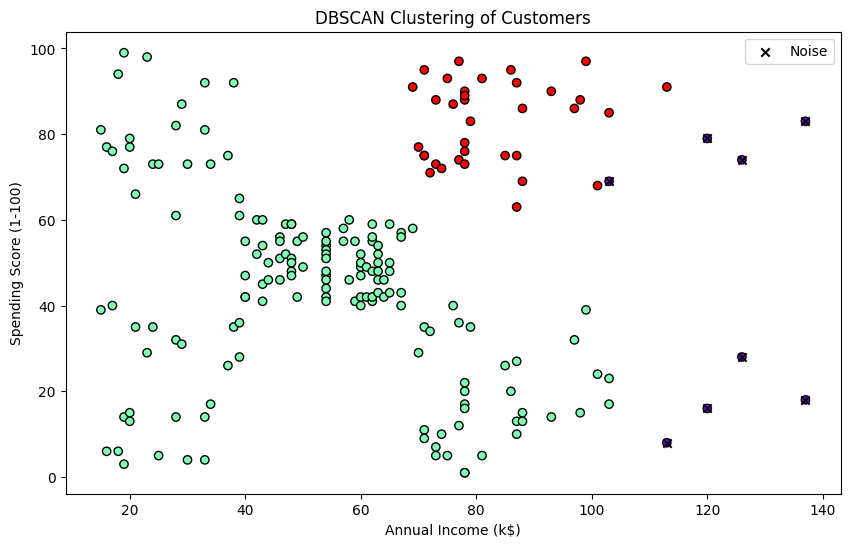

In [6]:
import matplotlib.pyplot as plt

# Set the colors for the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c=data['Cluster'], cmap='rainbow', marker='o', edgecolor='k')

# Highlight noise points (label -1)
plt.scatter(data[data['Cluster'] == -1]['Annual Income (k$)'],
            data[data['Cluster'] == -1]['Spending Score (1-100)'],
            color='black', marker='x', label='Noise')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [7]:
# Count the number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Analyze clusters
for cluster in set(clusters):
    if cluster != -1:  # Exclude noise
        cluster_data = data[data['Cluster'] == cluster]
        print(f'Cluster {cluster}:')
        print(cluster_data.describe())


Number of clusters: 2
Number of noise points: 8
Cluster 0:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  157.000000  157.000000          157.000000              157.000000   
mean    82.789809   40.369427           52.490446               43.101911   
std     51.492971   15.249332           21.811141               22.249225   
min      1.000000   18.000000           15.000000                1.000000   
25%     40.000000   26.000000           37.000000               28.000000   
50%     79.000000   40.000000           54.000000               46.000000   
75%    118.000000   51.000000           65.000000               55.000000   
max    191.000000   70.000000          103.000000               99.000000   

       Cluster  
count    157.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count  